<a href="https://colab.research.google.com/github/udai22/stockpredictionai/blob/master/Algo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Machine Learning Based Trading Bot 

PIP installs of necessary packages for Google Colab

In [ ]:
!pip install utils
!pip install yfinance 
!pip install GoogleNews
!pip install newspaper3k
!pip install pytrends


     |████████████████████████████████| 286kB 9.4MB/s 
     |████████████████████████████████| 215kB 8.8MB/s 
     |████████████████████████████████| 92kB 6.0MB/s 
     |████████████████████████████████| 7.4MB 10.9MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp36-none-any.whl size=7398406 sha256=3ba25dfa651de4252c28d48d515509c2d1b9e3ae1897918ab2400e7c1aa120e5
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da20627c013f438ed34
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp36-none-any.whl size=3355 sha256=e8f6f7b847a89d7e7f0e256891f18d95eea2f9fa79711c725c56a1a9cb752725
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7575424cfd3340f40ed
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp36-none-any.whl size=13538 sha256=a6864fa38468ad46ab64a9c17c806b7142c3aa85caccd237563babb6b8e72071
  Stored in directory: /root/.cac

Import libraries for use


In [ ]:
from utils import *
import math 
import time
import numpy as np
import pandas as pd
import datetime 
import seaborn as sns 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
import yfinance as yf 
import warnings
warnings.filterwarnings("ignore")
import urllib3
from urllib3 import request
import json
import certifi 
from pytrends.request import TrendReq


Create list of stock tickers (For sample use S&P 100)


In [ ]:
wiki_list = pd.read_html('https://en.wikipedia.org/wiki/S%26P_100') 
SP100_SYMBOLS = wiki_list[2]['Symbol'].values.tolist()

today = datetime.date.today()
end_date = today.strftime("%Y-%m-%d")
start_year = today.year - 10
start_date = str(start_year)+'-01-01'
SP100 = SP100_SYMBOLS

#Remove and Re-Add the proper Berkshire Hathaway Ticker
SP100.remove('BRK.B')
SP100.append('BRK-B')

Display list of stocks collected

In [ ]:
print(SP100)

['AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AIG', 'ALL', 'AMGN', 'AMT', 'AMZN', 'AXP', 'BA', 'BAC', 'BIIB', 'BK', 'BKNG', 'BLK', 'BMY', 'C', 'CAT', 'CHTR', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CRM', 'CSCO', 'CVS', 'CVX', 'DD', 'DHR', 'DIS', 'DOW', 'DUK', 'EMR', 'EXC', 'F', 'FB', 'FDX', 'GD', 'GE', 'GILD', 'GM', 'GOOG', 'GOOGL', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KHC', 'KMI', 'KO', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'MDLZ', 'MDT', 'MET', 'MMM', 'MO', 'MRK', 'MS', 'MSFT', 'NEE', 'NFLX', 'NKE', 'NVDA', 'ORCL', 'OXY', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RTX', 'SBUX', 'SLB', 'SO', 'SPG', 'T', 'TGT', 'TMO', 'TXN', 'UNH', 'UNP', 'UPS', 'USB', 'V', 'VZ', 'WBA', 'WFC', 'WMT', 'XOM', 'BRK-B']


Create a function that takes in a ticker and collects its stock price 

In [ ]:
def get_prices(ticker, start_date, end_date):
  Data = yf.download(ticker, start_date, end_date)
  Data.reset_index(inplace = True)
  Data = Data.rename(columns = {'index': 'Date', 'Close': 'Price'})
  Data = Data[['Date','Price','Volume']]
  return Data

In [ ]:
#collect data for the first stock in the ticker
ticker = SP100[0]
df = get_prices(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
def plot_stock_chart(data, ticker):
  plt.figure(figsize=(14, 5), dpi=100)
  plt.plot(data['Date'], data['Price'], label=f'{ticker} stock')
  plt.xlabel('Date')
  plt.ylabel('USD')
  plt.title(f'Stock Price for {ticker}')
  plt.legend()
  plt.show()

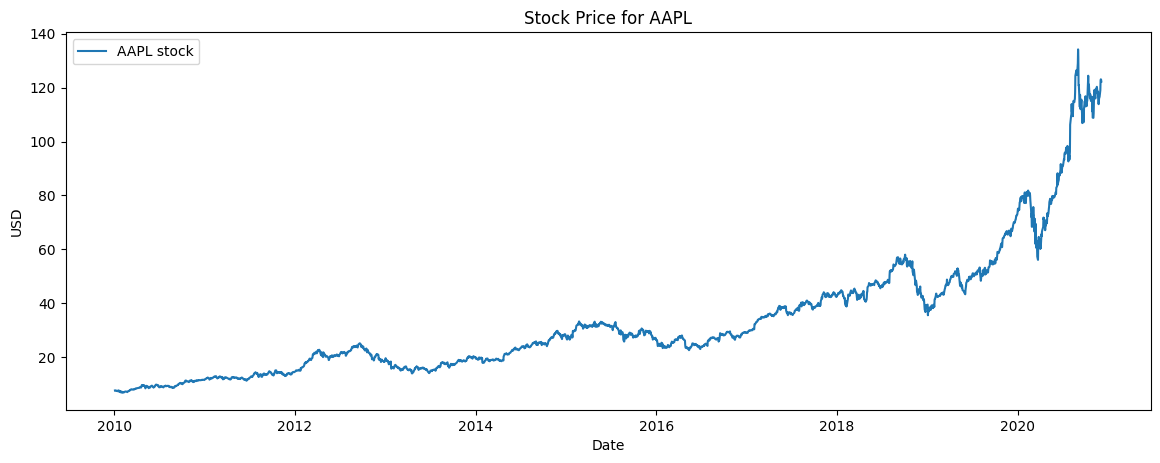

In [ ]:
#plot the stock price
plot_stock_chart(df, ticker)

In [ ]:
def append_treasury(df):
  treasury_data = yf.download(treasure_rate_symbol, start_date, end_date) 
  treasury_data = treasury_data[['Close']]
  treasury_data = treasury_data.rename(columns = {'Close': 'Treasury'})
  df = pd.merge(df, treasury_data, on=['Date'])
  print(df)
  return df


In [ ]:
def append_market_features(df, ticker, name):
  feature_data = yf.download(treasure_rate_symbol, start_date, end_date)
  feature_data = feature_data[['Close']]
  feature_data = feature_data.rename(columns = {'Close': name})
  print(feature_data)
  df = pd.merge(df, feature_data, on=['Date'])
  print(df)
  return df

In [ ]:
df = append_treasury(df)

[*********************100%***********************]  1 of 1 completed
           Date       Price     Volume  Treasury
0    2010-01-04    7.643214  493729600     3.841
1    2010-01-05    7.656428  601904800     3.755
2    2010-01-06    7.534643  552160000     3.808
3    2010-01-07    7.520714  477131200     3.822
4    2010-01-08    7.570714  447610800     3.808
...         ...         ...        ...       ...
2723 2020-11-30  119.050003  169410200     0.844
2724 2020-12-01  122.720001  128166800     0.934
2725 2020-12-02  123.080002   89004200     0.948
2726 2020-12-03  122.940002   78967600     0.920
2727 2020-12-04  122.250000   78133200     0.969

[2728 rows x 4 columns]


In [ ]:
df = append_market_features(df, "^DJI", "DOW")
df = append_market_features(df, "^GSPC", "SP500")
df = append_market_features(df, "^ISIC", "NDAQ")

[*********************100%***********************]  1 of 1 completed
              DOW
Date             
2010-01-04  3.841
2010-01-05  3.755
2010-01-06  3.808
2010-01-07  3.822
2010-01-08  3.808
...           ...
2020-11-30  0.844
2020-12-01  0.934
2020-12-02  0.948
2020-12-03  0.920
2020-12-04  0.969

[2728 rows x 1 columns]
           Date       Price     Volume  Treasury    DOW
0    2010-01-04    7.643214  493729600     3.841  3.841
1    2010-01-05    7.656428  601904800     3.755  3.755
2    2010-01-06    7.534643  552160000     3.808  3.808
3    2010-01-07    7.520714  477131200     3.822  3.822
4    2010-01-08    7.570714  447610800     3.808  3.808
...         ...         ...        ...       ...    ...
2723 2020-11-30  119.050003  169410200     0.844  0.844
2724 2020-12-01  122.720001  128166800     0.934  0.934
2725 2020-12-02  123.080002   89004200     0.948  0.948
2726 2020-12-03  122.940002   78967600     0.920  0.920
2727 2020-12-04  122.250000   78133200     0.969  0.969


In [ ]:
def append_trend_features(df,ticker):
  pytrends = TrendReq(hl='en-US',tz=360)
  input_ticker = [ticker]
  pytrends.build_payload(input_ticker,cat=0,timeframe = (start_date + " " + end_date),geo='',gprop='') 
  trends = pytrends.interest_over_time()
  

SyntaxError: ignored

### Generating Market Sentiment to input as a feature 


In [ ]:
#Generating News Sentiment

In [ ]:
def get_technical_indicators(dataset):
  #create moving averages
  dataset['ma7'] = dataset['Price'].rolling(window=7).mean()
  dataset['ma21'] = dataset['Price'].rolling(window=21).mean()

  #create MACD
  dataset['26ema'] = pd.Series.ewm(dataset['Price'], span = 26).mean()
  dataset['12ema'] = pd.Series.ewm(dataset['Price'], span = 12).mean()
  dataset['MACD'] = (dataset['12ema'] - dataset['26ema'])
  
  #create bollinger bands
  dataset['20sd'] = dataset['Price'].rolling(window =20).std()
  dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
  dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
  # Create Exponential moving average
  dataset['ema'] = dataset['Price'].ewm(com=0.5).mean()
  
  # Create Momentum
  dataset['momentum'] = dataset['Price']-1
  dataset['log-momentum'] = np.log2(dataset['momentum'])
  
  dataset.dropna(inplace = True)
  Price = dataset['Price']
  dataset.drop(labels = ['Price'], axis = 1, inplace = True)
  dataset = pd.concat([dataset, Price], axis = 1)
  dataset.set_index('Date', inplace=True)

  return dataset

In [ ]:
#create dataset with technical indicators 
df = get_technical_indicators(df)
print(df.head())
tech_df = df.copy()

               Volume  Treasury    DOW  ...  momentum  log-momentum     Price
Date                                    ...                                  
2010-02-02  698342400     3.635  3.635  ...  5.995000      2.583760  6.995000
2010-02-03  615328000     3.703  3.703  ...  6.115357      2.612437  7.115357
2010-02-04  757652000     3.610  3.610  ...  5.858929      2.550637  6.858929
2010-02-05  850306800     3.546  3.546  ...  5.980714      2.580318  6.980714
2010-02-08  478270800     3.592  3.592  ...  5.932857      2.568727  6.932857

[5 rows x 17 columns]


Create a function to normalize the dataset

In [ ]:
def normalise(df):
  minmax = MinMaxScaler()
  df['Volume'] = minmax.fit_transform(df['Volume'].values.reshape(-1,1))
  df['ma7'] = minmax.fit_transform(df['ma7'].values.reshape(-1,1))
  df['ma21'] = minmax.fit_transform(df['ma21'].values.reshape(-1,1))
  df['26ema'] = minmax.fit_transform(df['26ema'].values.reshape(-1,1))
  df['12ema'] = minmax.fit_transform(df['12ema'].values.reshape(-1,1))
  df['MACD'] = minmax.fit_transform(df['MACD'].values.reshape(-1,1))
  df['20sd'] = minmax.fit_transform(df['20sd'].values.reshape(-1,1))
  df['upper_band'] = minmax.fit_transform(df['upper_band'].values.reshape(-1,1))
  df['lower_band'] = minmax.fit_transform(df['lower_band'].values.reshape(-1,1))
  df['momentum'] = minmax.fit_transform(df['momentum'].values.reshape(-1,1))
  df['log-momentum'] = minmax.fit_transform(df['log-momentum'].values.reshape(-1,1))
  df['Price'] = minmax.fit_transform(df['Price'].values.reshape(-1,1))
  df['Treasury'] = minmax.fit_transform(df['Treasury'].values.reshape(-1,1))
  df['SP500'] = minmax.fit_transform(df['SP500'].values.reshape(-1,1))
  df['NDAQ'] = minmax.fit_transform(df['NDAQ'].values.reshape(-1,1))


  return df


In [ ]:
def denormalise(OG_df,norm_df):
  minmax = MinMaxScaler()
  price = minmax.fit_transform(OG_df['Price'].values.reshape(-1,1))
  inv = minmax.inverse_transform(norm_df['Price'].values.reshape(-1,1))

  return inv


In [ ]:
#Get normalised dataset
df_norm = normalise(df)
df.head()

,Volume,Treasury,DOW,SP500,NDAQ,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log-momentum,Price
Date,,,,,,,,,,,,,,,,,
2010-02-02,0.364437,0.897282,3.635,0.897282,0.897282,0.001489,0.002521,0.001217,0.001162,0.375076,0.017965,0.003970,0.001911,6.983854,0.001069,0.007350,0.001069
2010-02-03,0.319825,0.916738,3.703,0.916738,0.916738,0.001327,0.002301,0.001079,0.001065,0.375391,0.017471,0.003706,0.001757,7.071523,0.002014,0.013713,0.002014
2010-02-04,0.396310,0.890129,3.610,0.890129,0.890129,0.000742,0.001967,0.000750,0.000642,0.374293,0.019474,0.003685,0.001071,6.929793,0.000000,0.000000,0.000000
2010-02-05,0.446103,0.871817,3.546,0.871817,0.871817,0.000218,0.001735,0.000552,0.000448,0.374231,0.019948,0.003544,0.000746,6.963741,0.000957,0.006586,0.000957
2010-02-08,0.246170,0.884979,3.592,0.884979,0.884979,0.000000,0.001489,0.000336,0.000221,0.374012,0.020054,0.003340,0.000467,6.943152,0.000581,0.004014,0.000581


In [ ]:
#Check that the denormalizer works for price
Price_Denorm = denormalise(tech_df, df)
print(Price_Denorm)

[[  6.99499989]
 [  7.11535692]
 [  6.85892868]
 ...
 [123.08000183]
 [122.94000244]
 [122.25      ]]


Generate a correlation map 

In [ ]:
def plot_corr_map(df):
  corr = df.corr()
  ax = sns.heatmap(corr, cmap = "YlGnBu")
  plt.show()

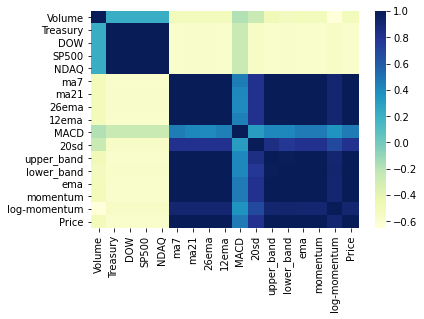

In [ ]:
#use the plot corr map function
plot_corr_map(tech_df)

### Training the Model

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras

In [ ]:
def prep_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    print ("Amount of features = {}".format(amount_of_features))
    data = stock.to_numpy()
    sequence_length = seq_len + 1 # index starting from 0
    result = []

    for index in range(len(data) - sequence_length): # maxmimum date = lastest date - sequence length
        result.append(data[index: index + sequence_length]) # index : index + sequence_length

    result = np.array(result)
    row = round(0.8 * result.shape[0]) # 80% split
    print ("Amount of training data = {}".format(0.8 * result.shape[0]))
    print ("Amount of testing data = {}".format(0.2 * result.shape[0]))

    train = result[:int(row), :] # 80% date
    X_train = train[:, :-1] # all data until day m
    y_train = train[:, -1][:,-1] # day m + 1 adjusted close price
    X_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], amount_of_features))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], amount_of_features))

    return [X_train, y_train, X_test, y_test]

In [ ]:
def preprocess(stock, seq_len):
    amount_of_features = len(stock.columns)
    print ("Amount of features = {}".format(amount_of_features))
    data = stock.to_numpy()
    sequence_length = seq_len + 1 # index starting from 0
    result = []

    for index in range(len(data) - sequence_length): # maxmimum date = lastest date - sequence length
        result.append(data[index: index + sequence_length]) # index : index + sequence_length
    
    result = np.array(result)
    row = round(result.shape[0])
    print ("Amount of training data = {}".format(0.8 * result.shape[0]))
    print ("Amount of testing data = {}".format(0.2 * result.shape[0]))
    train = result[:int(row), :] # 80% date
    X_train = train[:, :-1] # all data until day m
    y_train = train[:, -1][:,-1] # day m + 1 adjusted close price

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], amount_of_features))

    return [X_train, y_train]


In [ ]:
def build_model(shape, neurons, dropout, decay):
    model = Sequential()

    model.add(LSTM(neurons[0], input_shape=(shape[0], shape[1]), return_sequences=True))
    model.add(Dropout(dropout))

    model.add(LSTM(neurons[1], input_shape=(shape[0], shape[1]), return_sequences=False))
    model.add(Dropout(dropout))

    model.add(LSTM(neurons[1], input_shape=(shape[0], shape[1]), return_sequences=False))
    model.add(Dropout(dropout))
    
    model.add(Dense(neurons[2],kernel_initializer="uniform",activation='relu'))
    model.add(Dense(neurons[3],kernel_initializer="uniform",activation='linear'))
    # model = load_model('my_LSTM_stock_model1000.h5')
    adam = keras.optimizers.Adam(decay=decay)
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
#Train a model for ticker 
seq_len = 17
features = len(df.columns)
X_train, y_train, X_test, y_test = prep_data(df, seq_len)

Amount of features = 17
Amount of training data = 2152.0
Amount of testing data = 538.0


In [ ]:
shape = [seq_len, features, 1]
neurons = [256, 256, 32, 1]
dropout = 0.2
decay = 0.5
epochs = 150
model = build_model(shape, neurons, dropout, decay)

ValueError: ignored

In [ ]:
model.fit(
    X_train,
    y_train,
    batch_size = 512,
    epochs = epochs,
    )

Epoch 1/150
5/5 [==============================] - 3s 628ms/step - loss: 5.7759e-05 - accuracy: 0.0000e+00
Epoch 2/150
5/5 [==============================] - 3s 623ms/step - loss: 6.3809e-05 - accuracy: 0.0000e+00
Epoch 3/150
5/5 [==============================] - 3s 627ms/step - loss: 7.3079e-05 - accuracy: 0.0000e+00
Epoch 4/150
5/5 [==============================] - 3s 632ms/step - loss: 6.7217e-05 - accuracy: 0.0000e+00
Epoch 5/150
5/5 [==============================] - 3s 624ms/step - loss: 6.1492e-05 - accuracy: 0.0000e+00
Epoch 6/150
5/5 [==============================] - 3s 622ms/step - loss: 7.0042e-05 - accuracy: 0.0000e+00
Epoch 7/150
5/5 [==============================] - 3s 639ms/step - loss: 6.9868e-05 - accuracy: 0.0000e+00
Epoch 8/150
5/5 [==============================] - 3s 632ms/step - loss: 6.5191e-05 - accuracy: 0.0000e+00
Epoch 9/150
5/5 [==============================] - 3s 626ms/step - loss: 6.2609e-05 - accuracy: 0.0000e+00
Epoch 10/150
5/5 [===================

In [ ]:
pred = model.predict(X_test)

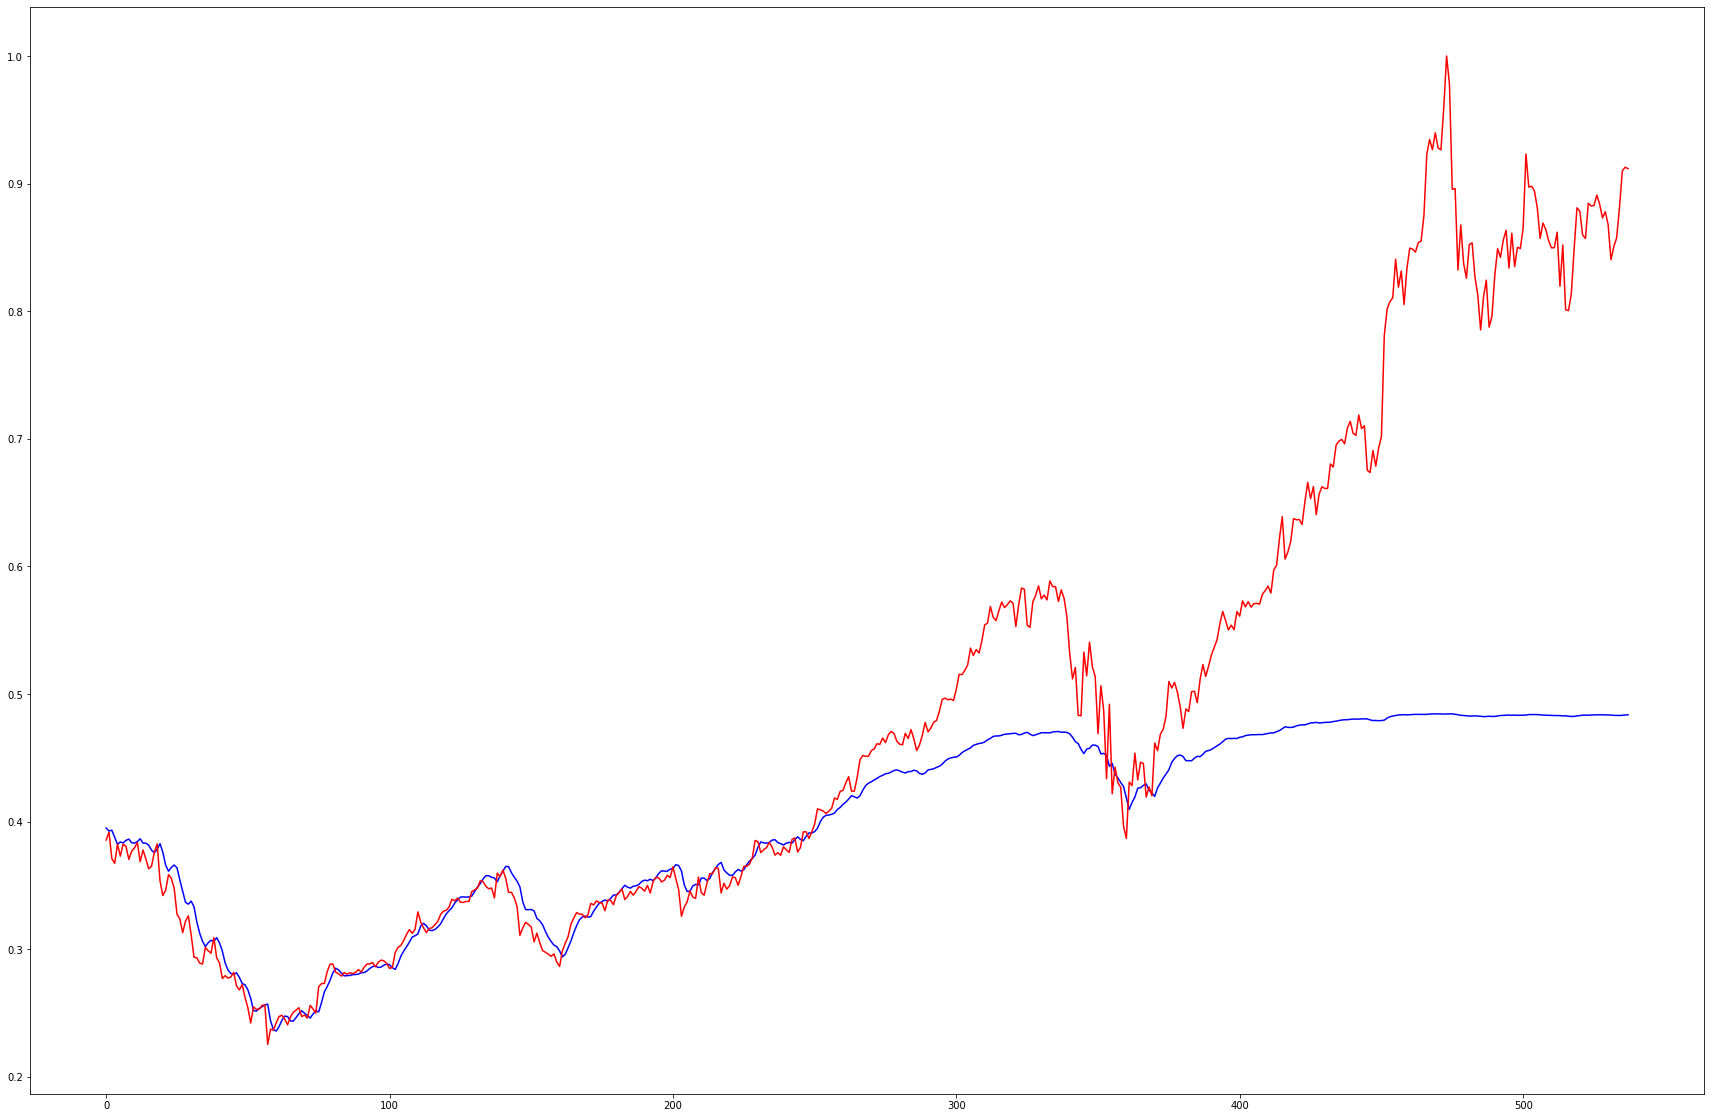

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(pred, color = 'blue')
plt.plot(y_test, color = 'red')

In [ ]:
#predict data from 20 days before.

start_date = '2020-08-15'
new_df = get_prices(ticker,start_date,end_date)
tech_df = new_df.copy()
new_df = append_treasury(new_df)
new_df = get_technical_indicators(new_df)
new_df = normalise(new_df)
X_use, y_use = preprocess(new_df,seq_len)

pred_2 = model.predict(X_use)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
         Date       Price     Volume  Treasury
0  2020-08-17  114.607498  119561600     0.683
1  2020-08-18  115.562500  105633600     0.669
2  2020-08-19  115.707497  145538000     0.675
3  2020-08-20  118.275002  126907200     0.644
4  2020-08-21  124.370003  338054800     0.640
..        ...         ...        ...       ...
72 2020-11-30  119.050003  169410200     0.844
73 2020-12-01  122.720001  128166800     0.934
74 2020-12-02  123.080002   89004200     0.948
75 2020-12-03  122.940002   78967600     0.920
76 2020-12-04  122.250000   78133200     0.969

[77 rows x 4 columns]


KeyError: ignored

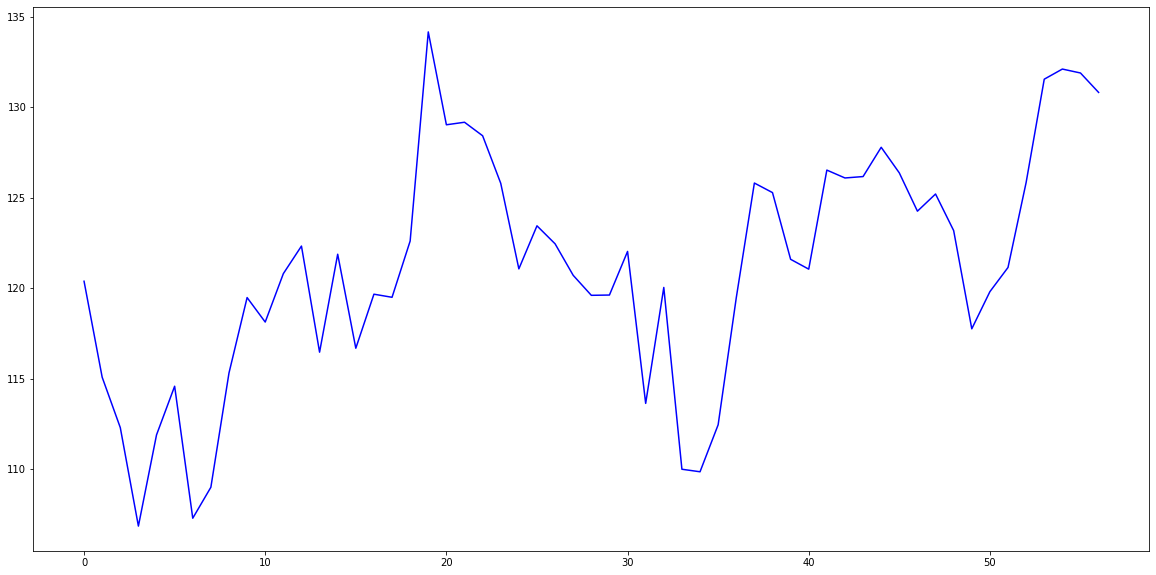

In [ ]:
price = denormalise(tech_df, new_df)
plt.figure(figsize=(20,10))
plt.plot(price, color = 'blue')

In [ ]:
start_date = '2019-08-15'
df = get_prices(ticker,start_date,'2020-12-02') 

[*********************100%***********************]  1 of 1 completed


In [ ]:
#ARIMA
from statsmodels.tsa.arima_model import ARIMA 
from pandas import datetime 
from sklearn.metrics import mean_squared_error

series = df['Price']
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  327
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -723.466
Method:                       css-mle   S.D. of innovations              2.211
Date:                Sat, 05 Dec 2020   AIC                           1460.932
Time:                        15:35:55   BIC                           1487.462
Sample:                             1   HQIC                          1471.518
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2200      0.109      2.024      0.044       0.007       0.433
ar.L1.D.Price    -0.1648      0.055     -2.974      0.003      -0.273      -0.056
ar.L2.D.Price     0.0464      0.056     

In [ ]:
from statsmodels.tsa.arima_model import ARIMA 
from pandas import datetime 
from sklearn.metrics import mean_squared_error

series = df['Price']
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

X = series.values
size = int(len(X) * 0.66)
train = X
history = [x for x in train]
model = ARIMA(history, order=(5,1,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast()
print(output[0])


                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  327
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -723.466
Method:                       css-mle   S.D. of innovations              2.211
Date:                Sat, 05 Dec 2020   AIC                           1460.932
Time:                        15:36:13   BIC                           1487.462
Sample:                             1   HQIC                          1471.518
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2200      0.109      2.024      0.044       0.007       0.433
ar.L1.D.Price    -0.1648      0.055     -2.974      0.003      -0.273      -0.056
ar.L2.D.Price     0.0464      0.056     

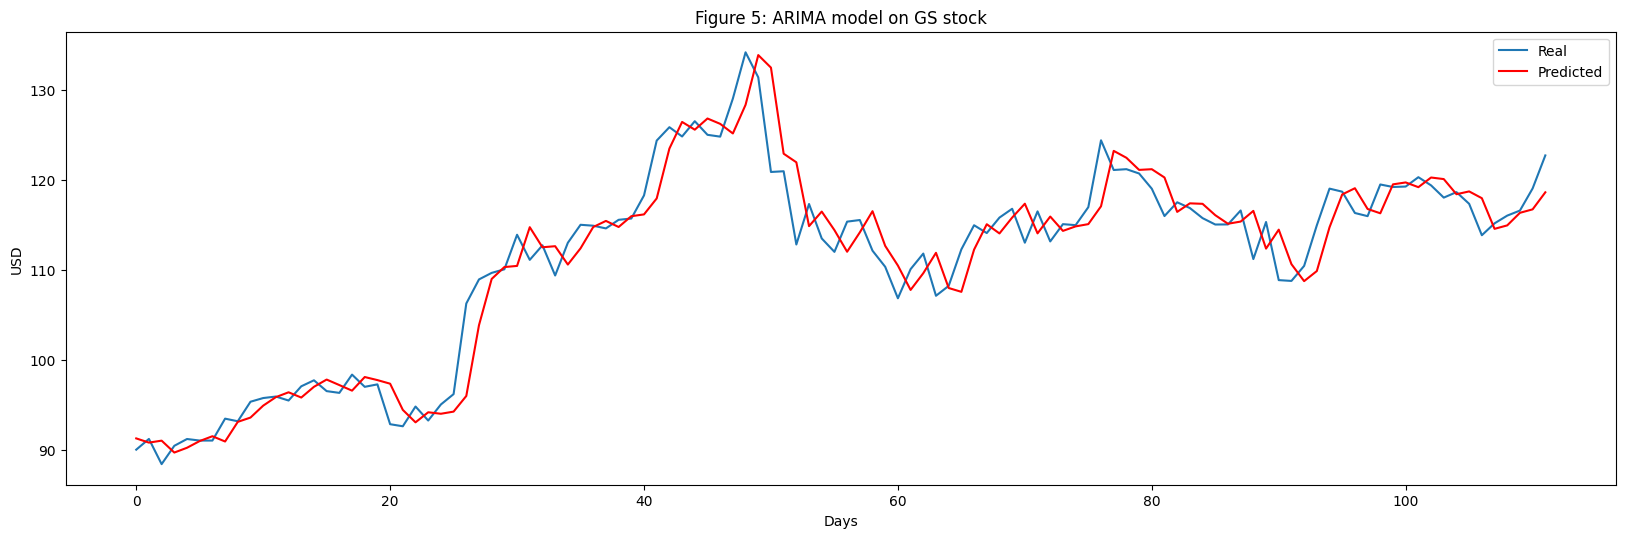

In [ ]:
plt.figure(figsize=(20, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 5: ARIMA model on GS stock')
plt.legend()
plt.show()